In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placement-dataset-for-outlier-removal/placement.csv


In [2]:
df = pd.read_csv('/kaggle/input/placement-dataset-for-outlier-removal/placement.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import warnings
warnings.filterwarnings("ignore")

<Axes: xlabel='placement_exam_marks', ylabel='Density'>

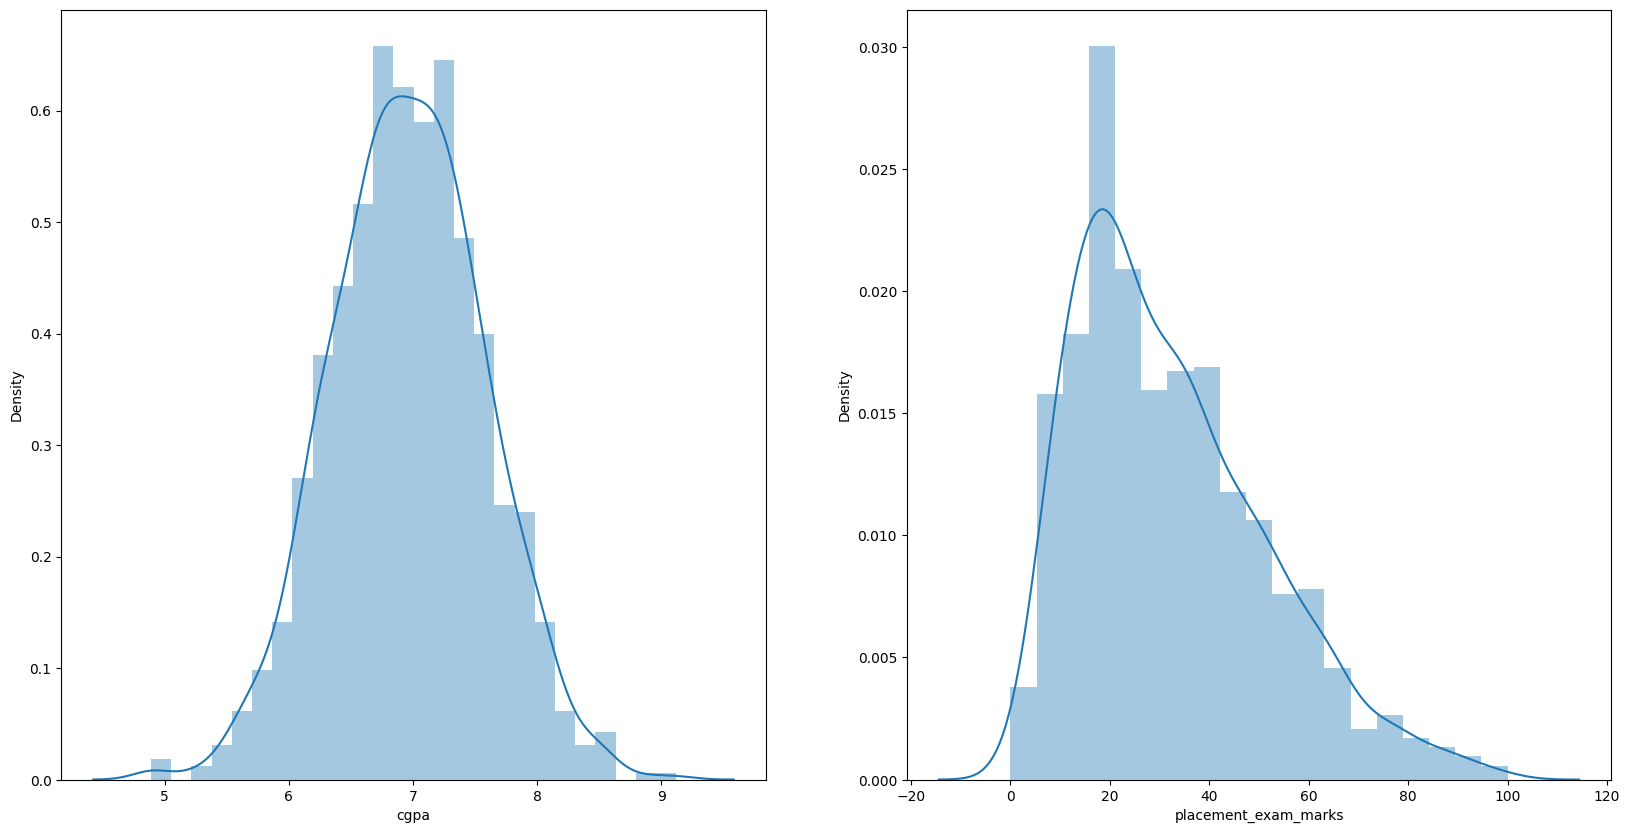

In [8]:
fig = plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

### IQR outlier removal technique can be used when data is skewed

<Axes: >

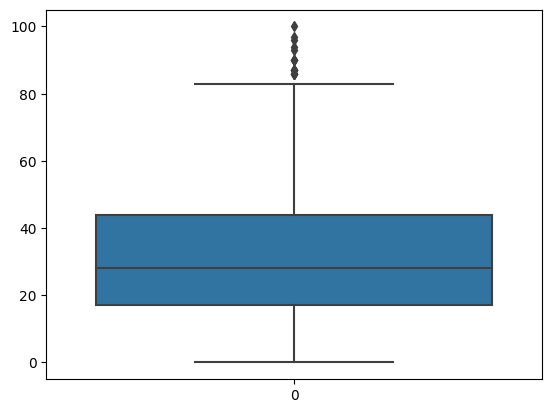

In [9]:
sns.boxplot(df['placement_exam_marks'])

There are outliers

In [10]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [15]:
IQR = df['placement_exam_marks'].quantile(0.75) - df['placement_exam_marks'].quantile(0.25)

In [16]:
upperlimit = df['placement_exam_marks'].quantile(0.75) + 1.5 * IQR
lowerlimit = df['placement_exam_marks'].quantile(0.25) - 1.5 * IQR

In [17]:
upperlimit

84.5

In [20]:
new_df = df[ (df['placement_exam_marks'] > lowerlimit) & (df['placement_exam_marks'] < upperlimit)]

In [21]:
new_df.shape

(985, 3)

<Axes: xlabel='placement_exam_marks', ylabel='Density'>

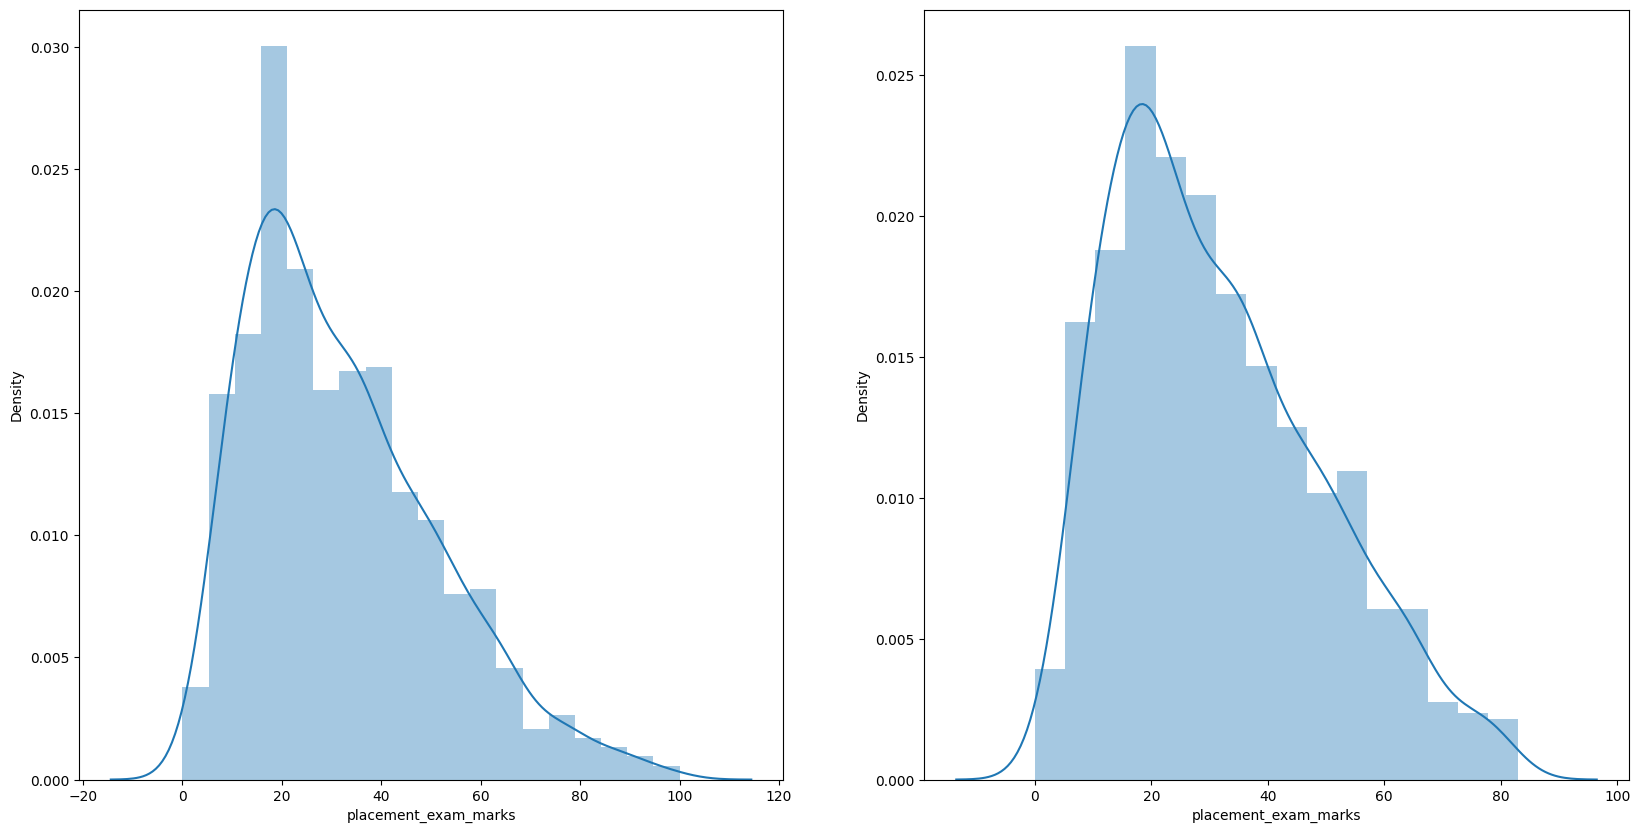

In [24]:
fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(1,2,2)
sns.distplot(new_df['placement_exam_marks'])

<Axes: >

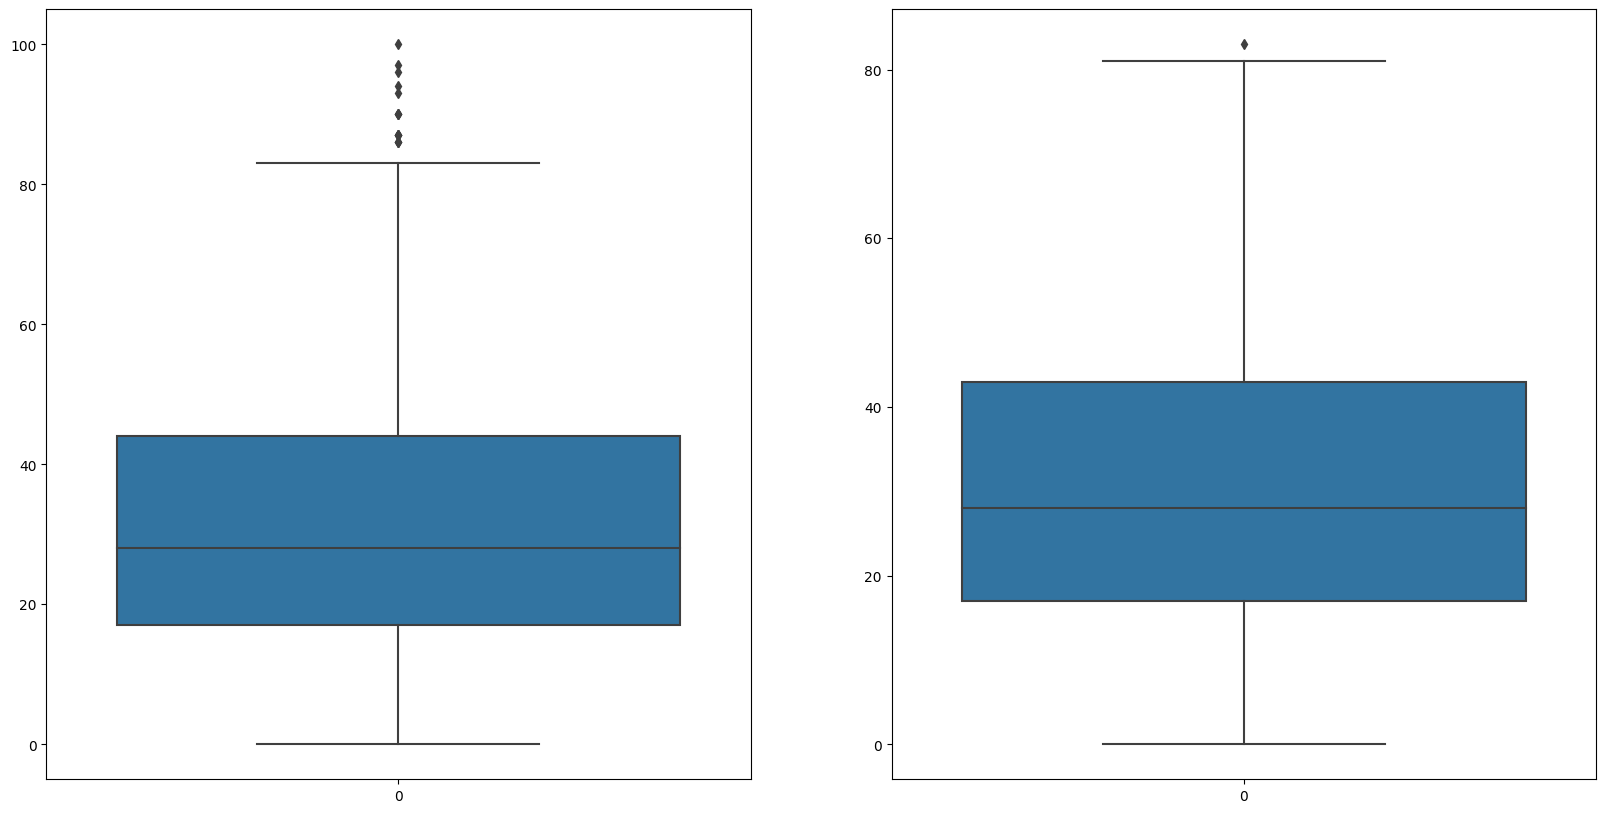

In [25]:
fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(1,2,2)
sns.boxplot(new_df['placement_exam_marks'])